In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,homogeneity_score
from IPython.display import Image
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data
data = pd.read_csv("/content/sample_data/Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


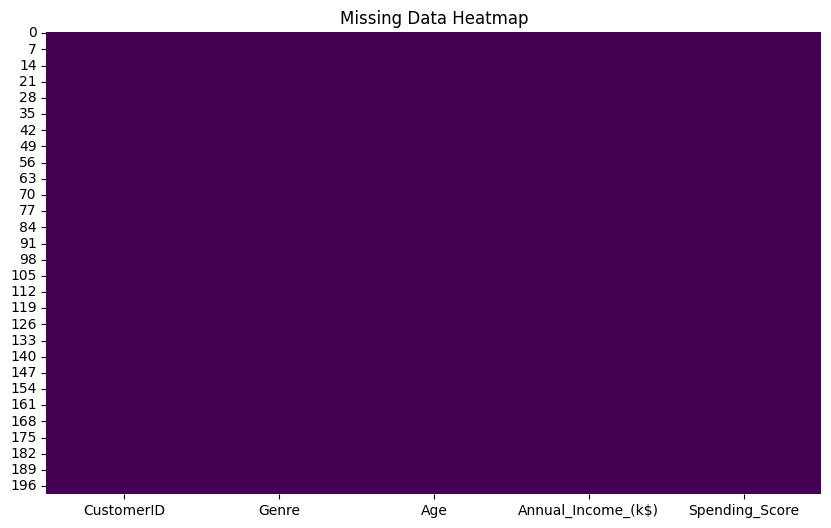

In [9]:
#check for missing values
print(data.isnull().sum())

#visualizing the missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [10]:
# data cleaning and pre-processing
print(data.duplicated().sum())

0


EXPLORATORY Data Analysis
**bold text**

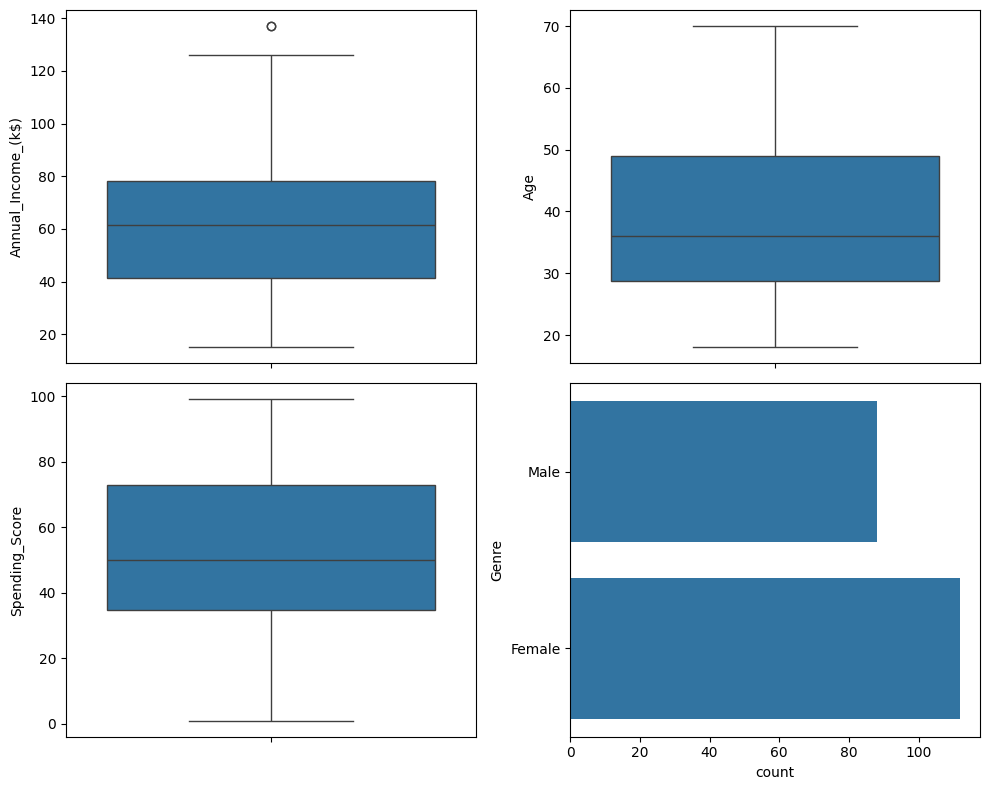

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt1 = sns.boxplot(data['Annual_Income_(k$)'], ax=axs[0, 0])
plt2 = sns.boxplot(data['Age'], ax=axs[0, 1])
plt3 = sns.boxplot(data['Spending_Score'], ax=axs[1, 0])
plt4 = sns.countplot(data['Genre'], ax=axs[1, 1])

plt.tight_layout()
plt.show()



In [21]:
from sklearn.preprocessing import LabelEncoder

#label Encoding

encoder = LabelEncoder() # method initialization

#looping for columns except survived
for c in data.columns[1:]:
  if (data[c].dtype == 'object'):
    data[c] = encoder.fit_transform(data[c])

  else:
    data[c] = data[c]

data.head()




,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [24]:
#Remove Customer Id column
data.drop('CustomerID', axis=1, inplace=True)
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


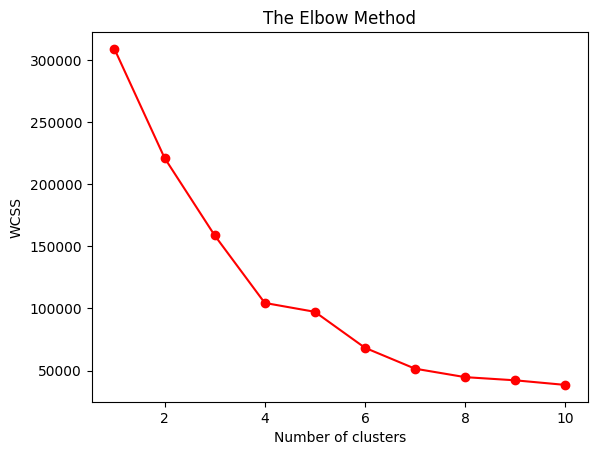

In [26]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='red', marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
# fit k-means clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data)


#Add cluster labels to data
data['Cluster'] = kmeans.labels_
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,0
3,0,23,16,77,2
4,0,31,17,40,0


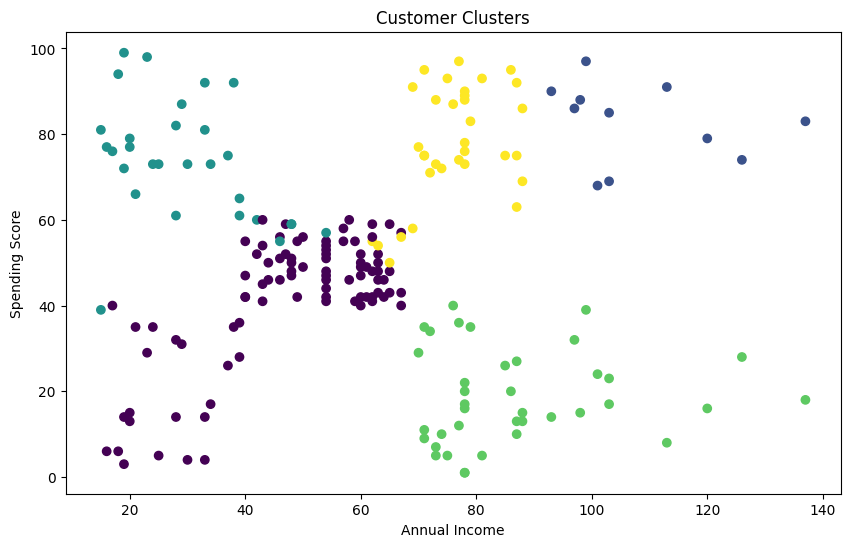

Silhouette Score: 0.39579161116761696


In [31]:
# Visualize cluster results
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['Cluster'], label='centroids')
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data[['Annual_Income_(k$)','Spending_Score']], kmeans.labels_)
print("Silhouette Score:", silhouette_avg)



The chart represents customer segmentation based on two variables: Annual Income (on the x-axis) and Spending Score (on the y-axis). The data is clustered into distinct groups, likely determined using a clustering algorithm such as k-means. Here are the key observations:

Observations:
High Spenders with Moderate Income:

The cluster in yellow represents customers with moderate annual incomes (~$70,000–$90,000) but high spending scores (above 60). This group likely includes individuals who prioritize high discretionary spending regardless of their moderate income levels.
Low Income, High Spending:

The teal-colored cluster comprises customers with lower incomes (below ~$40,000) but a high tendency to spend (spending scores above 60). These could represent a younger demographic or individuals focused on specific lifestyle priorities.
Moderate to Low Spending across All Incomes:

The purple cluster includes customers with diverse annual incomes (ranging from ~$20,000 to ~$90,000) but consistently low spending scores (below 40). These customers likely prioritize savings or have fewer opportunities for discretionary spending.
High Income, Low Spending:

The green cluster includes high-income individuals (above ~$100,000) with low spending scores (below 40). These customers may reflect a demographic that prioritizes wealth accumulation or investments over consumer spending.
High Income, High Spending:

The blue cluster represents customers with both high incomes (above ~$100,000) and high spending scores (above 60). This elite group likely includes individuals with the capacity and tendency to spend generously, making them a prime target for premium offerings.
Narrative:
The segmentation provides valuable insights for strategic marketing and business planning. Each cluster represents unique consumer behaviors and financial profiles, enabling businesses to tailor their strategies to meet the specific needs and preferences of these groups.

For example:

Yellow Cluster: A focused campaign for high-value offerings or loyalty programs might resonate well with these active spenders.
Teal Cluster: Affordable luxury or budget-friendly options could engage this group effectively.
Purple Cluster: Strategies to boost engagement through promotions or incentives might convert these low spenders into higher contributors.
Green Cluster: Upselling high-ticket, investment-focused products or experiences may appeal to this financially capable yet reserved segment.
Blue Cluster: Luxury and premium brands should focus on exclusivity and quality to cater to these affluent spenders.
By leveraging such segmentation, businesses can create hyper-personalized strategies to maximize customer satisfaction and profitability.







